In [6]:
# Pruebas con Poliastro

from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit

     

In [12]:
# Definiendo la órbita 

r = [-6045, -3490, 2500] * u.km #posicion
v = [-3.457, 6.618, 2.533] * u.km / u.s #velocidad

ss = Orbit.from_vectors(Earth, r, v) # calcula la órbita


7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)


In [ ]:
# Por defecto, definimos las órbitas en el 01-01-2000 12:00

In [13]:
from astropy.time import Time
Orbit.from_vectors(Earth, r, v, epoch=Time.now()) # Tiempo con gran precisión

7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch 2019-10-19 06:20:58.566819 (UTC)

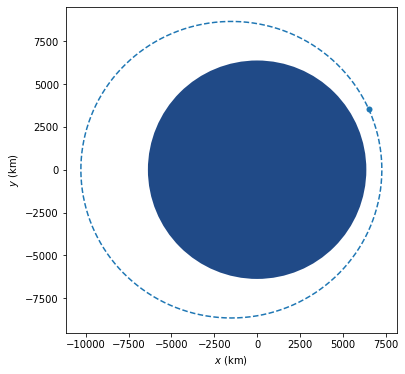

In [17]:
ss.plot()

In [18]:
# Cómo definir las órbitas utilizando elementos keplerianos
# Data for Mars at J2000 from JPL HORIZONS
a = 1.523679 * u.AU
ecc = 0.093315 * u.one
inc = 1.85 * u.deg
raan = 49.562 * u.deg
argp = 286.537 * u.deg
nu = 23.33 * u.deg

ss = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)

1 x 2 AU x 1.9 deg (HCRS) orbit around Sun (☉) at epoch J2000.000 (TT)

In [19]:
# Avanzando en el tiempo: propagación

from poliastro.examples import iss
iss

6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:00:00.000 (UTC)

In [20]:
iss.propagate(30 * u.min)

6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:30:00.000 (UTC)

In [21]:
# Cambiando la órbita: Objetos Maneuver
from poliastro.maneuver import Maneuver

ss_i = Orbit.circular(Earth, alt=700 * u.km)
ss_i

7078 x 7078 km x 0.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [22]:
hoh = Maneuver.hohmann(ss_i, 36000 * u.km)

In [23]:
hoh.get_total_cost()

<Quantity 3.6173999 km / s>

In [24]:
hoh.get_total_time().to(u.h)

<Quantity 4.36937032 h>

In [26]:
# Viajando a través del espacio: el Problema de Lambert
#  Simulamos el lanzamiento del Curiosity

date_launch = Time('2011-11-26 15:02', scale='utc')
date_arrival = Time('2012-08-06 05:17', scale ='utc')

In [28]:
ss0 = Orbit.from_body_ephem(Earth, date_launch)
ssf = Orbit.from_body_ephem(Mars, date_arrival)

In [42]:
man_lambert = Maneuver.lambert(ss0, ssf)
dv_a, dv_b = man_lambert.impulses

In [43]:
dv_a

(<Quantity 0. s>, <Quantity [-2.06420561,  2.58796837,  0.23911543] km / s>)

In [44]:
dv_b

(<Quantity 21910501.00019529 s>,
 <Quantity [287832.91384349,  58935.96079319, -94156.93383463] km / d>)